# Лабораторная работа № 3. Логистическая регрессия. Часть 3

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import datasets

In [286]:
data = pd.read_csv("Titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Удаление строк с пропущенными значениями

In [287]:
data_clean = data.dropna()
data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Удаление столбцов PassengerId, Name, Ticket, Cabin

In [288]:
data_clean = data_clean.drop(columns=['Name', 'Ticket', 'Cabin'])
data_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
3,4,1,1,female,35.0,1,0,53.1000,S
6,7,0,1,male,54.0,0,0,51.8625,S
10,11,1,3,female,4.0,1,1,16.7000,S
11,12,1,1,female,58.0,0,0,26.5500,S


Вычисление процента потерянных данных

In [289]:
100*(1-data_clean.size/data.size)

84.5959595959596

Перекодирование столбцов Sex и Embarked в числовые значения

In [290]:
oe = OrdinalEncoder(dtype=int)

data_clean['Sex'] = oe.fit_transform(data_clean[['Sex']])
data_clean['Embarked'] = oe.fit_transform(data_clean[['Embarked']])

data_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,0,38.0,1,0,71.2833,0
3,4,1,1,0,35.0,1,0,53.1000,2
6,7,0,1,1,54.0,0,0,51.8625,2
10,11,1,3,0,4.0,1,1,16.7000,2
11,12,1,1,0,58.0,0,0,26.5500,2


Удаление столбца PassengerId, т.к. он не несёт полезной информации

In [291]:
data_clean = data_clean.drop(columns=['PassengerId'])

data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,0
3,1,1,0,35.0,1,0,53.1000,2
6,0,1,1,54.0,0,0,51.8625,2
10,1,3,0,4.0,1,1,16.7000,2
11,1,1,0,58.0,0,0,26.5500,2


Теперь применяем метод логистической регрессии

In [292]:
train, test = train_test_split(data_clean, test_size=0.2)

In [293]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [294]:
model = LogisticRegression(random_state=0, max_iter=1000)

X_train = train[features]
Y_train = train['Survived']

model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [295]:
X_test = test[features]
Y_test = test['Survived']
model.score(X_test, Y_test)

0.7837837837837838

Теперь оценим влияние признака Embarked на точность, для чего просто исключим его и пересчитаем модель

In [296]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [297]:
model = LogisticRegression(random_state=0, max_iter=1000)

X_train = train[features]
Y_train = train['Survived']

model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [298]:
X_test = test[features]
Y_test = test['Survived']
model.score(X_test, Y_test)

0.7567567567567568

Точность изменилась почти на 3%, значит этот признак оказал не сильное влияние

In [299]:
Y_pred = model.predict(X_test)

Метрика Precision

In [300]:
metrics.precision_score(Y_test, Y_pred)

0.8260869565217391

Метрика Recall

In [301]:
metrics.recall_score(Y_test, Y_pred)

0.7916666666666666

Метрика F1

In [302]:
metrics.f1_score(Y_test, Y_pred)

0.8085106382978723

Тепловая карта матрицы ошибок

<Axes: >

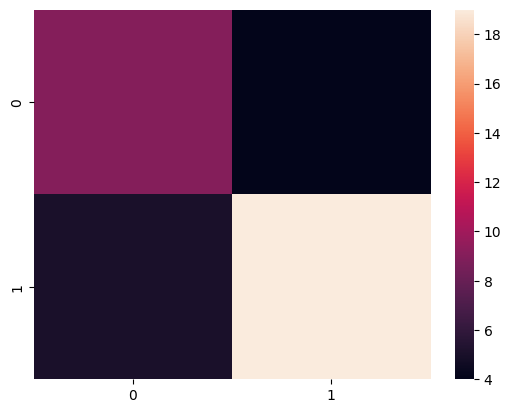

In [303]:
cm = metrics.confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm)

Оценки вероятности

In [304]:
Y_score = model.predict_proba(X_test)[:, 1]

Кривая PR

In [305]:
precision, recall, thresholds = metrics.precision_recall_curve(Y_test, Y_score)

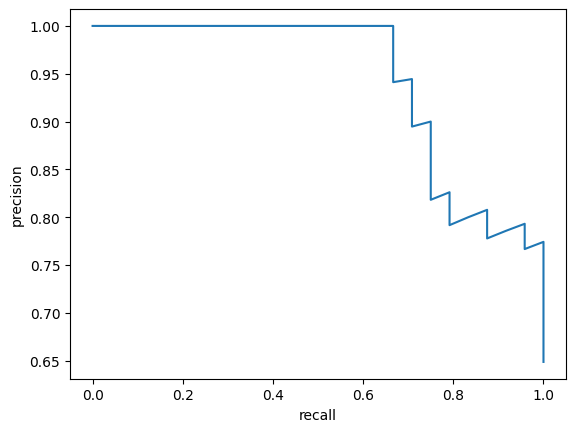

In [306]:
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

Кривая ROC

In [307]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)

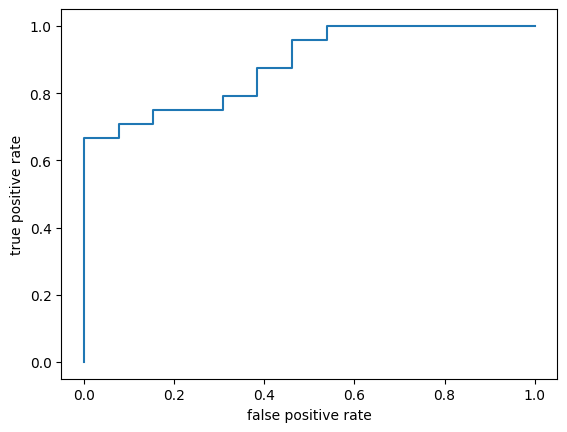

In [308]:
plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

Решение этой же задачи, но теперь методом опорных векторов

In [309]:
svm = SVC(kernel="rbf", probability=True)
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)

Проверяем все те же метрики

In [310]:
metrics.precision_score(Y_test, Y_pred)

0.6486486486486487

In [311]:
metrics.recall_score(Y_test, Y_pred)

1.0

In [312]:
metrics.f1_score(Y_test, Y_pred)

0.7868852459016393

<Axes: >

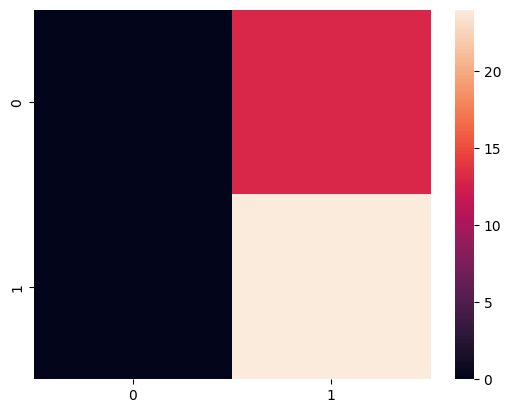

In [313]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm)

In [314]:
Y_score = svm.predict_proba(X_test)[:, 1]

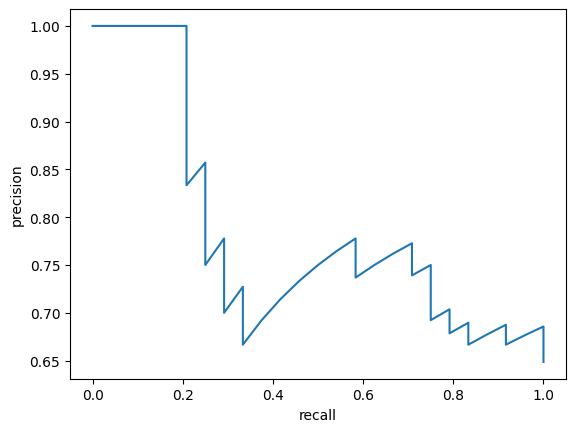

In [315]:
precision, recall, thresholds = metrics.precision_recall_curve(Y_test, Y_score)

plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

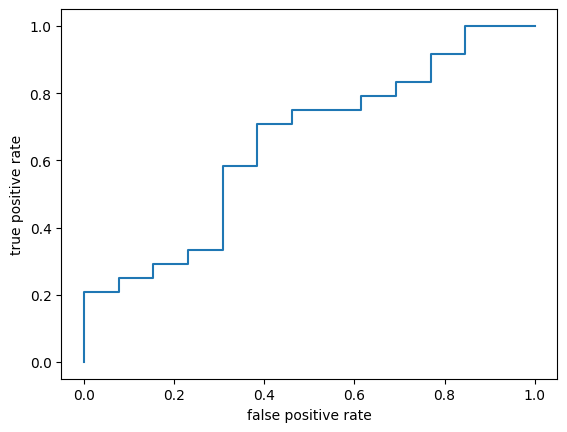

In [316]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)

plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

Повторяем всё, но уже для метода ближайших соседей

In [317]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

И опять метрики

In [318]:
metrics.precision_score(Y_test, Y_pred)

0.625

In [319]:
metrics.recall_score(Y_test, Y_pred)

0.8333333333333334

In [320]:
metrics.f1_score(Y_test, Y_pred)

0.7142857142857143

<Axes: >

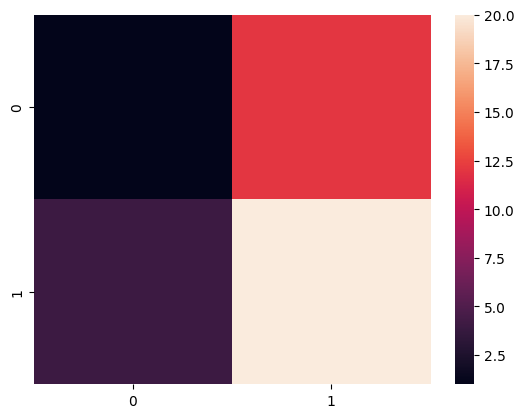

In [321]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm)

In [322]:
Y_score = knn.predict_proba(X_test)[:, 1]

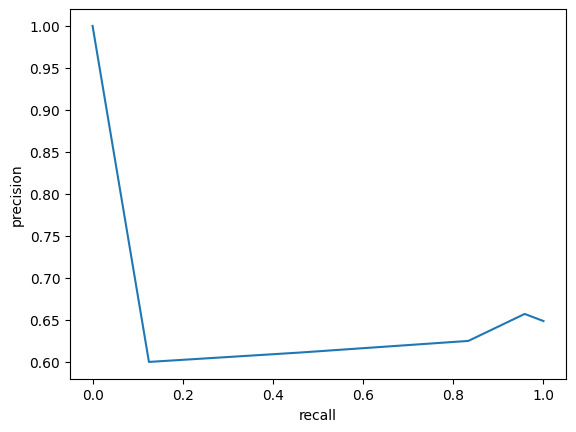

In [323]:
precision, recall, thresholds = metrics.precision_recall_curve(Y_test, Y_score)

plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

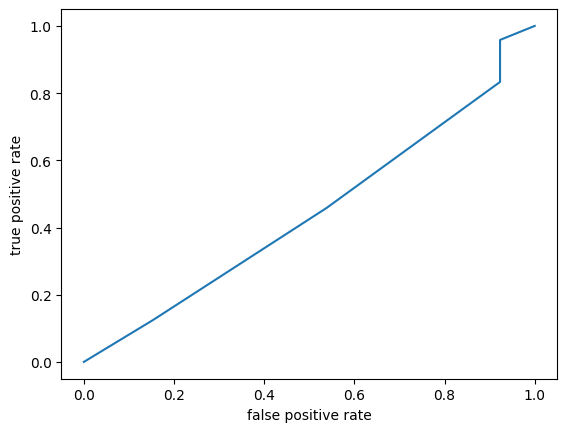

In [324]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_score)

plt.plot(fpr, tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

Судя по метрикам, из всех 3 моделей наилучшей является логистическая регрессия, а наихудшей - метод ближайших соседей